In [1]:
# Constants for the earth-sun system
time = 0
maxTime = 365 * 24 * 60 * 60

xpositions = [0, 1.5e11]
ypositions = [0, 0]
zpositions = [0, 0]

xvelocities = [0, 0]
yvelocities = [0, 15000] #29722
zvelocities = [0, 0]

masses = [1.989e30, 5.9722e24]

In [2]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt

G = 6.67e-11

C:\Users\Work Account\anaconda3\lib\site-packages\numpy\__init__.py:143: UserWarning: mkl-service package failed to import, therefore Intel(R) MKL initialization ensuring its correct out-of-the box operation under condition when Gnu OpenMP had already been loaded by Python process is not assured. Please install mkl-service package, see http://github.com/IntelPython/mkl-service
  from . import _distributor_init


ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.9 from "C:\Users\Work Account\anaconda3\python.exe"
  * The NumPy version is: "1.20.3"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: DLL load failed while importing _multiarray_umath: The specified module could not be found.


In [3]:
# Function to generate cluster properties
def generateCluster(numberOfStars, clusterRadius, alpha, driftVelocity):
    # Setting the random seed
    #np.random.seed(seed)

    # Generating a number of random values of x, y and z in a square of radius R
    xCandidates = 2*clusterRadius*np.random.random(numberOfStars*5) - clusterRadius
    yCandidates = 2*clusterRadius*np.random.random(numberOfStars*5) - clusterRadius
    zCandidates = 2*clusterRadius*np.random.random(numberOfStars*5) - clusterRadius

    # Creating empty array for star r positions
    rValues = np.array([], dtype=np.float64)
    xValues = np.array([], dtype=np.float64)
    yValues = np.array([], dtype=np.float64)
    zValues = np.array([], dtype=np.float64)

    # Turning these into array elements
    for i in range(len(xCandidates)):
        # Truth testing if star lies in right range
        if np.sqrt(xCandidates[i]**2+yCandidates[i]**2+zCandidates[i]**2) < clusterRadius:
            # Adding the successful values to the arrays
            rValues = np.append(rValues,[xCandidates[i], yCandidates[i], zCandidates[i]])
            xValues = np.append(xValues, xCandidates[i])
            yValues = np.append(yValues, yCandidates[i])
            zValues = np.append(zValues, zCandidates[i])
        else:
            pass

    # Only taking the first N values of the array
    xValues = xValues[:numberOfStars]
    yValues = yValues[:numberOfStars]
    zValues = zValues[:numberOfStars]

    # Generating the masses of the cluster componenets
    #masses = np.ones(numberOfStars)*1.9e30*np.random.random(numberOfStars)
    masses = np.random.lognormal(np.log(0.079),0.69, numberOfStars) * 1.989e30

    # Finding the centre of mass of the system
    totalMass = np.sum(masses)
    comX = np.sum(xValues*masses)/totalMass
    comY = np.sum(yValues*masses)/totalMass
    comZ = np.sum(zValues*masses)/totalMass

    # Correcting so that Centre of Masses lies at 0,0,0
    xValuesCentered = xValues - comX
    yValuesCentered = yValues - comY
    zValuesCentered = zValues - comZ

    # Determining GPE of the system
    GPE = 0

    for i in range(numberOfStars):
        ri = np.array([xValuesCentered[i], yValuesCentered[i], zValuesCentered[i]])
        for j in range(numberOfStars):
            if i==j:
                pass
            else:
                rj = np.array([xValuesCentered[j], yValuesCentered[j], zValuesCentered[j]])
                rij = np.linalg.norm(ri-rj)
                GPE += masses[i]*masses[j]*G/rij

    # Generating some random velocities
    vx = 2*np.random.random(numberOfStars) - 1
    vy = 2*np.random.random(numberOfStars) - 1
    vz = 2*np.random.random(numberOfStars) - 1

    # Determining the centre of velocity
    comVX = np.sum(vx*masses)/totalMass
    comVY = np.sum(vy*masses)/totalMass
    comVZ = np.sum(vz*masses)/totalMass

    # Centering the velocities
    vxCentered = vx - comVX
    vyCentered = vy - comVY
    vzCentered = vz - comVZ

    # Determining the KE
    v = vxCentered**2 + vyCentered**2 + vzCentered**2
    KE = np.sum(0.5*masses*v)

    # Finding how KE and G are related
    KEscale = GPE/(alpha*KE)
    
    # Scaling the velocities
    vxCorrected = vx*np.sqrt(KEscale)
    vyCorrected = vy*np.sqrt(KEscale)
    vzCorrected = vz*np.sqrt(KEscale)

    # Adding on a random drift velocity in some direction
    driftX = driftVelocity*(2*np.random.random(1)-1)
    driftY = driftVelocity*(2*np.random.random(1)-1)
    driftZ = driftVelocity*(2*np.random.random(1)-1)

    vxCentered = vxCentered + driftX
    vyCentered = vyCentered + driftY
    vzCentered = vzCentered + driftZ

    # Returning the values
    return xValuesCentered, yValuesCentered, zValuesCentered, vxCorrected, vyCorrected, vzCorrected, masses


In [4]:
def outputICs(time, maxTime, xpositions, ypositions, zpositions, xvelocities, yvelocities, zvelocities, masses):
    # Defining the name of the file
    fname = "simData.txt"

    # Opening the file
    with open(fname, "w") as file:
        
        # Writing the headers
        file.write("Time MaxTime Xpos Ypos Zpos Xvel Yvel Zvel Mass \n")

        numberOfObjects = len(xpositions)

        # Looping through each object 
        for i in range(numberOfObjects):
            file.write(str(time) + " " + str(maxTime) + " ")
            file.write(str(xpositions[i]) + " " + str(ypositions[i]) + " " + str(zpositions[i]) + " ")
            file.write(str(xvelocities[i]) + " " + str(yvelocities[i]) + " " + str(zvelocities[i]) + " ")
            file.write(str(masses[i]) + "\n") 

In [5]:
# Generating a line of clusters
def fillamentGenerator(numberOfClusters, clusterSeparation, clusterStarNumber, clusterRadius, alpha, driftVelocity):

    # Generating the offset direction
    clusterDirectionX = 2*np.random.random(numberOfClusters)-1
    clusterDirectionY = 2*np.random.random(numberOfClusters)-1
    clusterDirectionZ = 2*np.random.random(numberOfClusters)-1
    clusterDirections = []

    # Creating the master offset 
    offsets = np.arange(1, numberOfClusters+1, 1)
    offsets = offsets * clusterSeparation

    for i in range(numberOfClusters):
        normalisationConstant = np.sqrt(clusterDirectionX[i]**2 + clusterDirectionY[i]**2 +  clusterDirectionZ[i]**2)
        offset = normalisationConstant * offsets[i]
        clusterDirections.append([offset*clusterDirectionX[i], offset*clusterDirectionY[i], offset*clusterDirectionZ[i]])

    # Defining arrays
    x = []; y = []; z = []; vx = []; vy = []; vz = []; m = []

    # Generating the clusters and offsetting them
    for i in range(numberOfClusters):
        xpos, ypos, zpos, vxs, vys, vzs, ms = generateCluster(clusterStarNumber, clusterRadius, alpha, driftVelocity)
        adjuster = clusterDirections[i]
        for j in range(len(xpos)):
            x.append(xpos[j]+adjuster[0])
            y.append(ypos[j]+adjuster[1])
            z.append(zpos[j]+adjuster[2])
        
            vx.append(vxs[i])
            vy.append(vys[i])
            vz.append(vzs[i])
            m.append(ms[i])

    return x, y, z, vx, vy, vz, m

def generateCylindricalFilament(numberOfClusters, clusterSeparation, clyinderRadius, clusterStarNumber, clusterRadius, alpha, driftVelocity):

    # Setting the central axis values
    clusterPositions = np.arange(0, numberOfClusters, 1)
    zValues = clusterPositions * clusterSeparation

    # Calculating the x and y values
    xValues = 2*np.random.random(numberOfClusters*2) - 1
    yValues = 2*np.random.random(numberOfClusters*2) - 1

    # Getting the ones that lie in the radius we want
    xValuesList = xValues[np.sqrt(xValues**2 + yValues**2) < 1]
    yValuesList = yValues[np.sqrt(xValues**2 + yValues**2) < 1]
    
    # Getting the right number of values
    xValuesChosen = xValuesList * clyinderRadius
    yValuesChosen = yValuesList * clyinderRadius

    # Setting the offsets
    clusterOffsets = []
    for i in range(numberOfClusters):
        clusterOffsets.append([xValuesChosen[i],yValuesChosen[i],zValues[i]])

    # Generating the right number of clusters and positioning them
    x = []; y = []; z = []; vx = []; vy = []; vz = []; m = []

    for i in range(numberOfClusters):
        xpos, ypos, zpos, vxs, vys, vzs, ms = generateCluster(clusterStarNumber, clusterRadius, alpha, driftVelocity)
        adjuster = clusterOffsets[i]

        for j in range(len(xpos)):
            x.append(xpos[j]+adjuster[0])
            y.append(ypos[j]+adjuster[1])
            z.append(zpos[j]+adjuster[2])
        
            vx.append(vxs[i])
            vy.append(vys[i])
            vz.append(vzs[i])
            m.append(ms[i])

    return x, y, z, vx, vy, vz, m

In [6]:
x, y, z, vx, vy, vz, m = generateCluster(5, 100e11, 2, 0)

outputICs(0, 60*60*24*365*1000, x, y, z, vx, vy, vz, m)

NameError: name 'np' is not defined

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
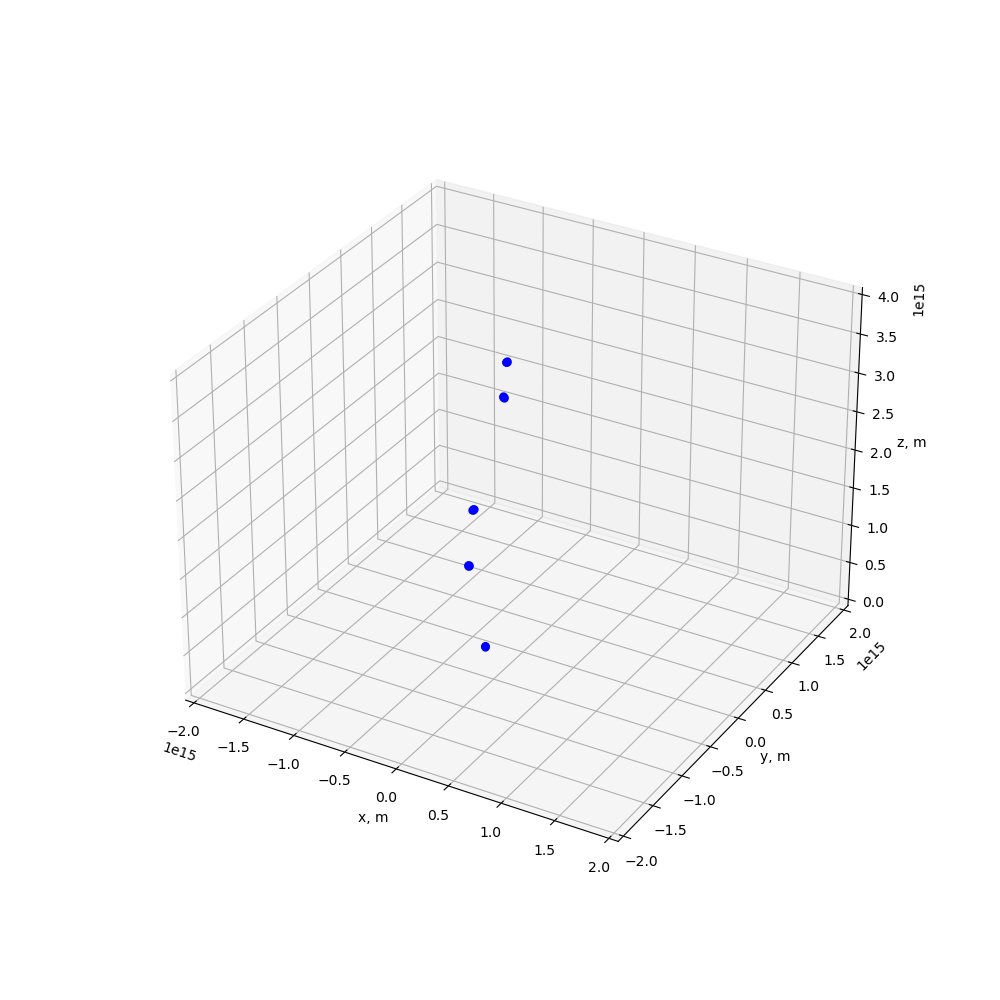

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
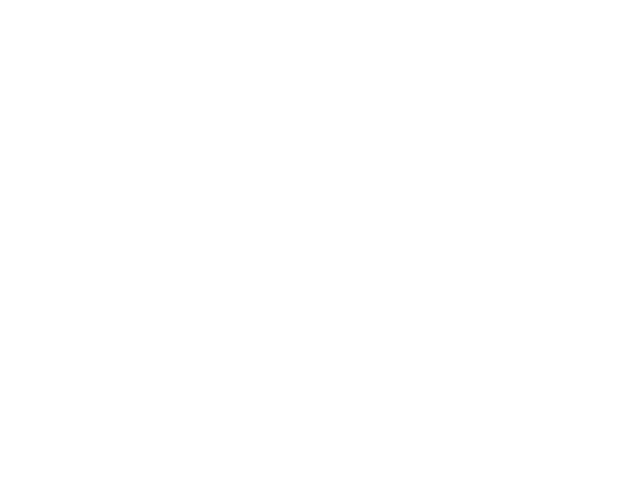

In [9]:
# Generating some example clusters for plotting
x, y, z, vx, vy, vz, m = generateCylindricalFilament(5, 10000e11, 5000e11, 5, 100e11, 2, 200)

# Plotting
%matplotlib widget
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")
plt.plot(x, y, z, "bo", markersize=5)
plt.xlabel("x, m")
plt.ylabel("y, m")
ax.set_zlabel("z, m")
plt.xlim(0.5*-1*max(z), 0.5*1*max(z))
plt.ylim(0.5*-1*max(z), 0.5*1*max(z))

plt.figure()
plt.hist(np.sqrt(vx**2 + vy**2 + vz**2))
plt.xlabel("|Velocity|, m/s")
plt.ylabel("Frequency")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
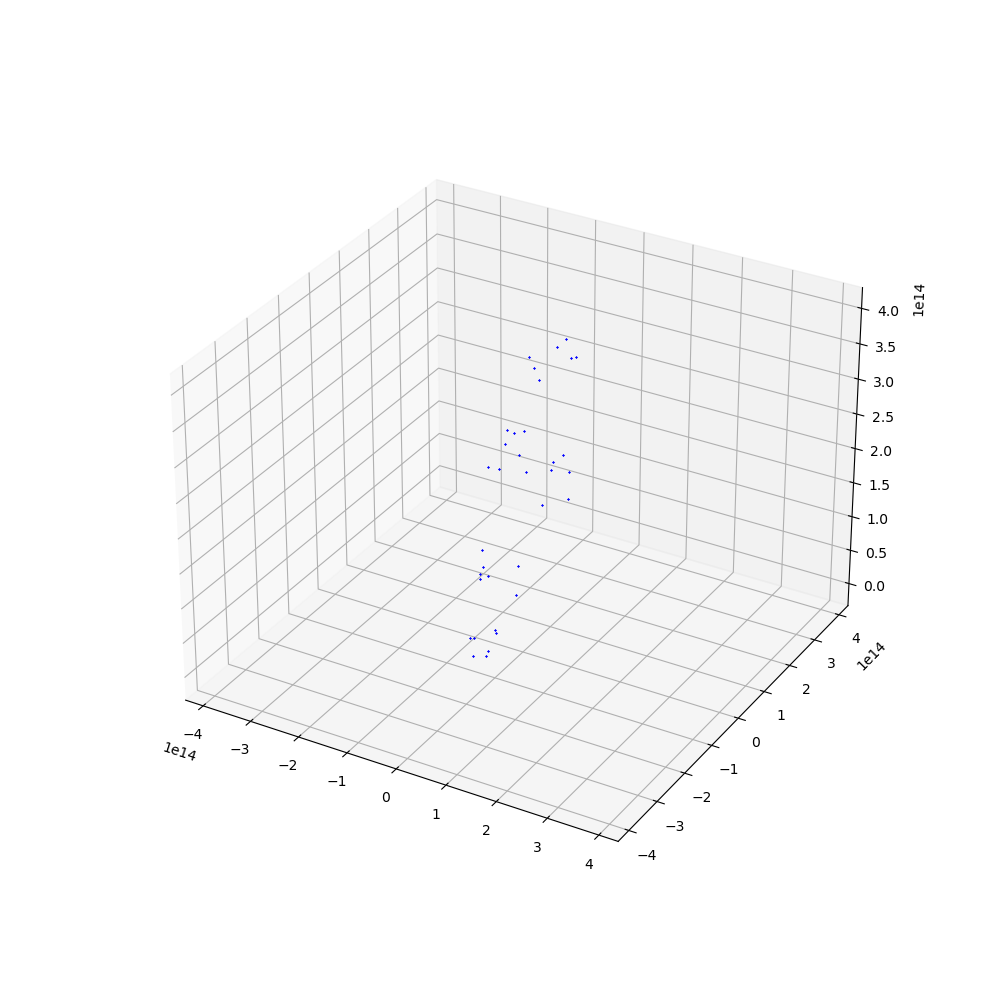

In [28]:
# Generating the desired initial conditions
nc = 5 # number of clusters
cs = 1000e11 # cluster separation / fillament cluster separation
cr = 1000e11 # fillament cylinder radius
ns = 7 # stars per cluster
sr = 500e11 # cluster spherical radius
a = 2 # alpha
dr = 200 # drift velocity
t = 60*60*24*364*1000 # time to iterate for

x, y, z, vx, vy, vz, m = generateCylindricalFilament(nc, cs, cr, ns, sr, a, dr)

# Plotting the stars for visualisation
%matplotlib widget
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")
plt.plot(x, y, z, "bx", markersize=1)

plt.ylim((-max(z),max(z)))
plt.xlim((-max(z),max(z)))

# Saving the star data to a file
outputICs(0,t,x,y,z,vx,vy,vz,m)

Text(0, 0.5, 'log10(Frequency)')

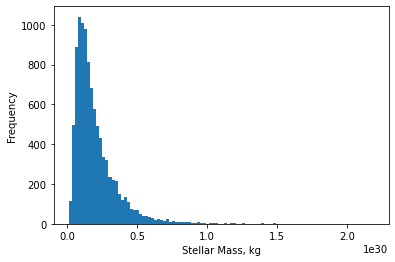

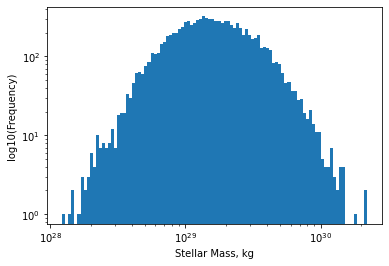

In [14]:
# Function to generate the initial mass function
m = 1.989e30*np.random.lognormal(np.log(0.079),0.69, 10000)


plt.figure()
hist2, bins2, _ = plt.hist(m, bins=100)
logbins2 = np.logspace(np.log10(bins2[0]), np.log10(bins2[-1]), len(bins2))
plt.xlabel("Stellar Mass, kg")
plt.ylabel("Frequency")


plt.figure()
plt.hist(m, bins=logbins2)
plt.xscale("log")
plt.yscale('log')
plt.xlabel("Stellar Mass, kg")
plt.ylabel("log10(Frequency)")